In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy
import scipy.signal
from mpl_toolkits import mplot3d
from functions import *
data = np.loadtxt("lff.dat")

In [38]:
# count the number of spikes 
intervals = np.diff([x for x in range(len(data)-2) if np.sign(data[x]) != np.sign(data[x+1])])
print(n:=len(intervals))

1463


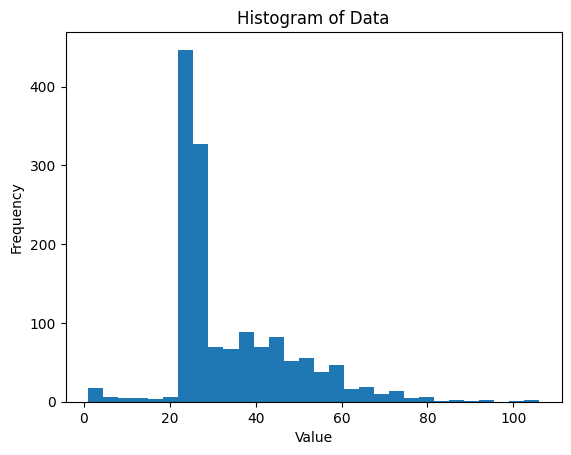

In [39]:
#Plot the histogram of data values and calculate the moments of the distribution.
plt.hist(intervals, 30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()


In [43]:
#The four moments of distribution are: Mean, Variance, Skewness, Kurtosis, Coefficient of Variation

S = np.std(intervals)
median = np.median(intervals)
mean = np.mean(intervals)
variance = np.var(intervals)
skewness = scipy.stats.skew(intervals)
kurtosis = scipy.stats.kurtosis(intervals)
CoV = S/abs(mean)
print(median)
print(mean)
print(skewness)
print(kurtosis)
print(CoV)

26.0
34.133971291866025
1.248831371811103
2.087053511788559
0.416347866113205


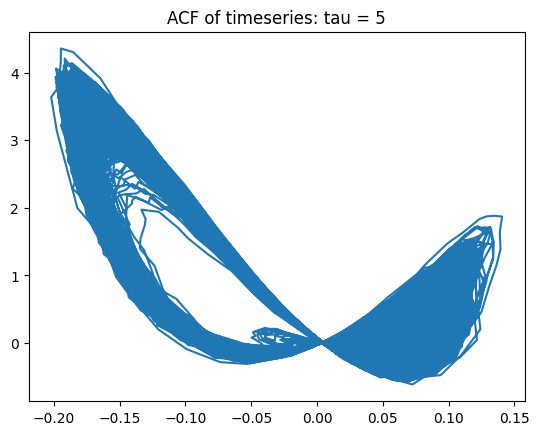

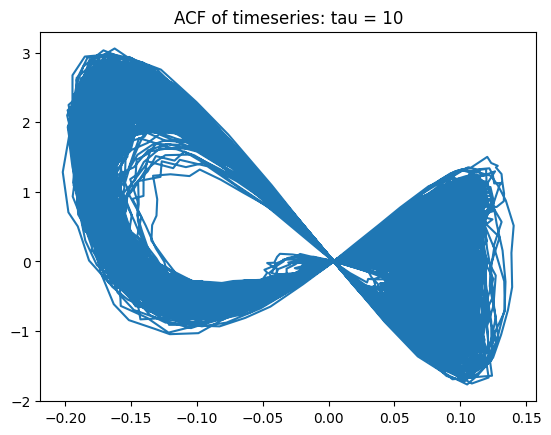

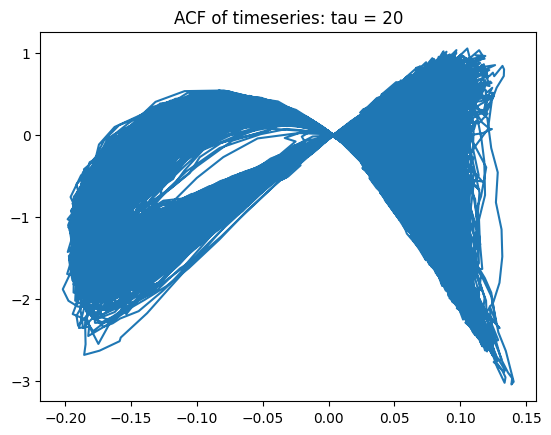

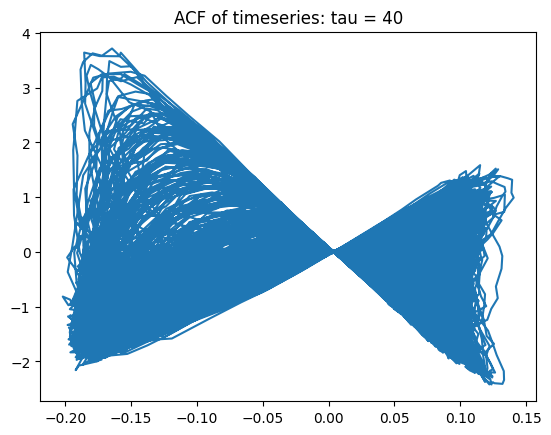

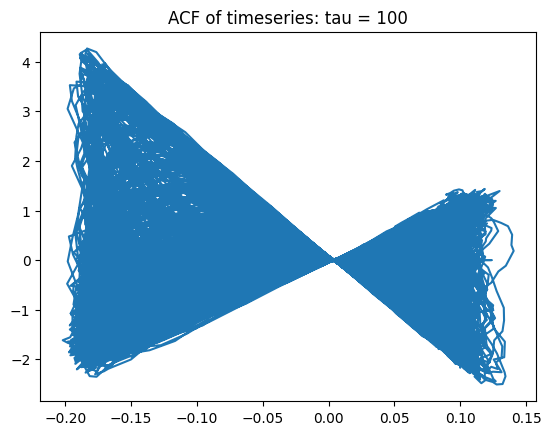

[array([1.25231229, 1.54760888, 2.10628599, ..., 0.        , 0.        ,
        0.        ]),
 array([1.43161346, 1.62122624, 1.98541113, ..., 0.        , 0.        ,
        0.        ]),
 array([0.3876306 , 0.32450029, 0.24198339, ..., 0.        , 0.        ,
        0.        ]),
 array([-0.70113873, -0.82828741, -1.01051573, ...,  0.        ,
         0.        ,  0.        ]),
 array([-0.59138473, -0.69350556, -0.84034754, ...,  0.        ,
         0.        ,  0.        ])]

In [47]:
# Calculate and plot the autocorrelation function.

def ACF(data, tau):
    ACF = np.zeros(len(data))
    for x in range(len(data)-(tau+1)):
        ACF[x] = (data[x] - np.mean(data)) * (data[x+tau] - np.mean(data)) / np.std(data)**2
    plt.plot(data, ACF)
    plt.title("ACF of timeseries: tau = " + str(tau))
    plt.show()
    return ACF

[ACF(data, tau) for tau in [5, 10, 20, 40, 100]]

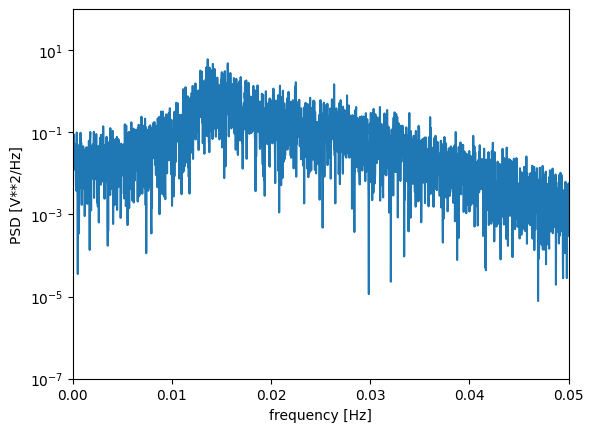

0.014


In [74]:
(f, S) = scipy.signal.periodogram(data, 1, scaling='density')
plt.semilogy(f, S)
plt.ylim([1e-7, 1e2])
plt.xlim([0,0.05])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
print(1/(ISI:=1000/14))

As we can see, the peak of the lower range of the PSD seems to coincide with 1/ISI, which is 0.014

Reconstruct the attractor from peaks of the PSD:

49956
49956
49956


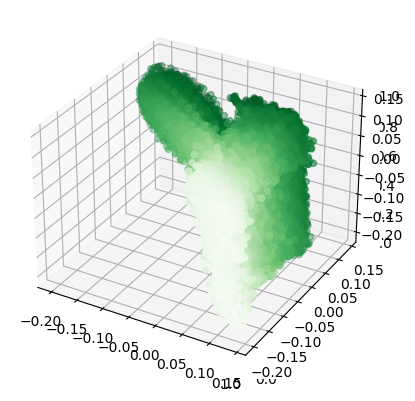

In [86]:
tau = 22

ax = plt.axes(projection='3d')

zline = data[:-(2*tau)]
xline = data[tau:-(tau)]
yline = data[2*tau:]

print(len(xline))
print(len(yline))

print(len(zline))

ax = plt.axes(projection='3d')
ax.scatter3D(xline, yline, zline, c=yline, cmap='Greens')